In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import dlib
import re

In [3]:
import cv2

# Define a few variables

In [4]:
basedir = './dataset_AMLS_22-23/celeba'
images_dir = os.path.join(basedir,'img')
labels_filename = 'labels.csv'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Define a set of functions to be used to extract the features 

In [5]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)

    # loop over all facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [6]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [7]:
def run_dlib_shape(image):
    # in this function we load the image, detect the landmarks of the face, and then return the image and the landmarks
    # load the input image, resize it, and convert it to grayscale
    resized_image = image.astype('uint8')

    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gray = gray.astype('uint8')

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    num_faces = len(rects)

    if num_faces == 0:
        return None, resized_image

    face_areas = np.zeros((1, num_faces))
    face_shapes = np.zeros((136, num_faces), dtype=np.int64)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        temp_shape = predictor(gray, rect)
        temp_shape = shape_to_np(temp_shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)],
        #   (x, y, w, h) = face_utils.rect_to_bb(rect)
        (x, y, w, h) = rect_to_bb(rect)
        face_shapes[:, i] = np.reshape(temp_shape, [136])
        face_areas[0, i] = w * h
    # find largest face and keep
    dlibout = np.reshape(np.transpose(face_shapes[:, np.argmax(face_areas)]), [68, 2])

    return dlibout, resized_image

In [15]:
def resize_image(img_array):
    pil_image = Image.fromarray(img_array)
    resized_image = pil_image.resize((5, 5))
    return np.array(resized_image)

In [16]:
# This function will return the RBG values of the cropped images (we only care about the eye, not the whole face)
def get_eye_2(image_file):
    image = Image.open(f'dataset_AMLS_22-23/cartoon_set/img/{image_file}')
    image_array = np.array(image)
    features,_ = run_dlib_shape(image_array)
    eye_features = [features[37], features[38], features[40], features[41]]
    horizontal_pixels = [element[0] for element in eye_features]
    vertical_pixels = [element[1] for element in eye_features] 
    iris_crop = [(min(horizontal_pixels), max(horizontal_pixels)), (min(vertical_pixels), max(vertical_pixels))]
    image_array = image_array[iris_crop[1][0]:iris_crop[1][1], iris_crop[0][0]:iris_crop[0][1], :]
    resized_image_arr = resize_image(image_array)
    """
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    right_eye = img_array[250:277, 190:227, :]
    print(f'Completed eye {iteration}')
    return right_eye.reshape((1, 2997))
    """
    return resized_image_arr[:, :, 0:3].reshape((1, 75))/255

# Create a dataset comprised of the iris images

In [10]:
cartoon_df = pd.read_csv('dataset_AMLS_22-23/cartoon_set/labels.csv', sep='\t')

In [11]:
cartoon_df.drop(cartoon_df.columns[0], axis=1, inplace=True)

In [12]:
cartoon_df

,eye_color,face_shape,file_name
0,1,4,0.png
1,2,4,1.png
2,2,3,2.png
3,2,0,3.png
4,0,2,4.png
...,...,...,...
9995,3,2,9995.png
9996,0,3,9996.png
9997,1,2,9997.png
9998,0,2,9998.png


In [18]:
# Create a list containing the RGB values of the cropped images
iris_list = []
labels_list = []
for i in range(10000):
    print(f'Iteration number: {i} out of 10000')
    try:
        iris_array = get_eye_2(f'{i}.png')
        iris_list.append(iris_array)
        labels_list.append(int(cartoon_df[cartoon_df['file_name'] == f'{i}.png']['eye_color']))
    except:
        continue

Iteration number: 0 out of 10000
Iteration number: 1 out of 10000
Iteration number: 2 out of 10000
Iteration number: 3 out of 10000
Iteration number: 4 out of 10000
Iteration number: 5 out of 10000
Iteration number: 6 out of 10000
Iteration number: 7 out of 10000
Iteration number: 8 out of 10000
Iteration number: 9 out of 10000
Iteration number: 10 out of 10000
Iteration number: 11 out of 10000
Iteration number: 12 out of 10000
Iteration number: 13 out of 10000
Iteration number: 14 out of 10000
Iteration number: 15 out of 10000
Iteration number: 16 out of 10000
Iteration number: 17 out of 10000
Iteration number: 18 out of 10000
Iteration number: 19 out of 10000
Iteration number: 20 out of 10000
Iteration number: 21 out of 10000
Iteration number: 22 out of 10000
Iteration number: 23 out of 10000
Iteration number: 24 out of 10000
Iteration number: 25 out of 10000
Iteration number: 26 out of 10000
Iteration number: 27 out of 10000
Iteration number: 28 out of 10000
Iteration number: 29 out

Iteration number: 238 out of 10000
Iteration number: 239 out of 10000
Iteration number: 240 out of 10000
Iteration number: 241 out of 10000
Iteration number: 242 out of 10000
Iteration number: 243 out of 10000
Iteration number: 244 out of 10000
Iteration number: 245 out of 10000
Iteration number: 246 out of 10000
Iteration number: 247 out of 10000
Iteration number: 248 out of 10000
Iteration number: 249 out of 10000
Iteration number: 250 out of 10000
Iteration number: 251 out of 10000
Iteration number: 252 out of 10000
Iteration number: 253 out of 10000
Iteration number: 254 out of 10000
Iteration number: 255 out of 10000
Iteration number: 256 out of 10000
Iteration number: 257 out of 10000
Iteration number: 258 out of 10000
Iteration number: 259 out of 10000
Iteration number: 260 out of 10000
Iteration number: 261 out of 10000
Iteration number: 262 out of 10000
Iteration number: 263 out of 10000
Iteration number: 264 out of 10000
Iteration number: 265 out of 10000
Iteration number: 26

Iteration number: 474 out of 10000
Iteration number: 475 out of 10000
Iteration number: 476 out of 10000
Iteration number: 477 out of 10000
Iteration number: 478 out of 10000
Iteration number: 479 out of 10000
Iteration number: 480 out of 10000
Iteration number: 481 out of 10000
Iteration number: 482 out of 10000
Iteration number: 483 out of 10000
Iteration number: 484 out of 10000
Iteration number: 485 out of 10000
Iteration number: 486 out of 10000
Iteration number: 487 out of 10000
Iteration number: 488 out of 10000
Iteration number: 489 out of 10000
Iteration number: 490 out of 10000
Iteration number: 491 out of 10000
Iteration number: 492 out of 10000
Iteration number: 493 out of 10000
Iteration number: 494 out of 10000
Iteration number: 495 out of 10000
Iteration number: 496 out of 10000
Iteration number: 497 out of 10000
Iteration number: 498 out of 10000
Iteration number: 499 out of 10000
Iteration number: 500 out of 10000
Iteration number: 501 out of 10000
Iteration number: 50

Iteration number: 709 out of 10000
Iteration number: 710 out of 10000
Iteration number: 711 out of 10000
Iteration number: 712 out of 10000
Iteration number: 713 out of 10000
Iteration number: 714 out of 10000
Iteration number: 715 out of 10000
Iteration number: 716 out of 10000
Iteration number: 717 out of 10000
Iteration number: 718 out of 10000
Iteration number: 719 out of 10000
Iteration number: 720 out of 10000
Iteration number: 721 out of 10000
Iteration number: 722 out of 10000
Iteration number: 723 out of 10000
Iteration number: 724 out of 10000
Iteration number: 725 out of 10000
Iteration number: 726 out of 10000
Iteration number: 727 out of 10000
Iteration number: 728 out of 10000
Iteration number: 729 out of 10000
Iteration number: 730 out of 10000
Iteration number: 731 out of 10000
Iteration number: 732 out of 10000
Iteration number: 733 out of 10000
Iteration number: 734 out of 10000
Iteration number: 735 out of 10000
Iteration number: 736 out of 10000
Iteration number: 73

Iteration number: 946 out of 10000
Iteration number: 947 out of 10000
Iteration number: 948 out of 10000
Iteration number: 949 out of 10000
Iteration number: 950 out of 10000
Iteration number: 951 out of 10000
Iteration number: 952 out of 10000
Iteration number: 953 out of 10000
Iteration number: 954 out of 10000
Iteration number: 955 out of 10000
Iteration number: 956 out of 10000
Iteration number: 957 out of 10000
Iteration number: 958 out of 10000
Iteration number: 959 out of 10000
Iteration number: 960 out of 10000
Iteration number: 961 out of 10000
Iteration number: 962 out of 10000
Iteration number: 963 out of 10000
Iteration number: 964 out of 10000
Iteration number: 965 out of 10000
Iteration number: 966 out of 10000
Iteration number: 967 out of 10000
Iteration number: 968 out of 10000
Iteration number: 969 out of 10000
Iteration number: 970 out of 10000
Iteration number: 971 out of 10000
Iteration number: 972 out of 10000
Iteration number: 973 out of 10000
Iteration number: 97

Iteration number: 1176 out of 10000
Iteration number: 1177 out of 10000
Iteration number: 1178 out of 10000
Iteration number: 1179 out of 10000
Iteration number: 1180 out of 10000
Iteration number: 1181 out of 10000
Iteration number: 1182 out of 10000
Iteration number: 1183 out of 10000
Iteration number: 1184 out of 10000
Iteration number: 1185 out of 10000
Iteration number: 1186 out of 10000
Iteration number: 1187 out of 10000
Iteration number: 1188 out of 10000
Iteration number: 1189 out of 10000
Iteration number: 1190 out of 10000
Iteration number: 1191 out of 10000
Iteration number: 1192 out of 10000
Iteration number: 1193 out of 10000
Iteration number: 1194 out of 10000
Iteration number: 1195 out of 10000
Iteration number: 1196 out of 10000
Iteration number: 1197 out of 10000
Iteration number: 1198 out of 10000
Iteration number: 1199 out of 10000
Iteration number: 1200 out of 10000
Iteration number: 1201 out of 10000
Iteration number: 1202 out of 10000
Iteration number: 1203 out o

Iteration number: 1405 out of 10000
Iteration number: 1406 out of 10000
Iteration number: 1407 out of 10000
Iteration number: 1408 out of 10000
Iteration number: 1409 out of 10000
Iteration number: 1410 out of 10000
Iteration number: 1411 out of 10000
Iteration number: 1412 out of 10000
Iteration number: 1413 out of 10000
Iteration number: 1414 out of 10000
Iteration number: 1415 out of 10000
Iteration number: 1416 out of 10000
Iteration number: 1417 out of 10000
Iteration number: 1418 out of 10000
Iteration number: 1419 out of 10000
Iteration number: 1420 out of 10000
Iteration number: 1421 out of 10000
Iteration number: 1422 out of 10000
Iteration number: 1423 out of 10000
Iteration number: 1424 out of 10000
Iteration number: 1425 out of 10000
Iteration number: 1426 out of 10000
Iteration number: 1427 out of 10000
Iteration number: 1428 out of 10000
Iteration number: 1429 out of 10000
Iteration number: 1430 out of 10000
Iteration number: 1431 out of 10000
Iteration number: 1432 out o

Iteration number: 1634 out of 10000
Iteration number: 1635 out of 10000
Iteration number: 1636 out of 10000
Iteration number: 1637 out of 10000
Iteration number: 1638 out of 10000
Iteration number: 1639 out of 10000
Iteration number: 1640 out of 10000
Iteration number: 1641 out of 10000
Iteration number: 1642 out of 10000
Iteration number: 1643 out of 10000
Iteration number: 1644 out of 10000
Iteration number: 1645 out of 10000
Iteration number: 1646 out of 10000
Iteration number: 1647 out of 10000
Iteration number: 1648 out of 10000
Iteration number: 1649 out of 10000
Iteration number: 1650 out of 10000
Iteration number: 1651 out of 10000
Iteration number: 1652 out of 10000
Iteration number: 1653 out of 10000
Iteration number: 1654 out of 10000
Iteration number: 1655 out of 10000
Iteration number: 1656 out of 10000
Iteration number: 1657 out of 10000
Iteration number: 1658 out of 10000
Iteration number: 1659 out of 10000
Iteration number: 1660 out of 10000
Iteration number: 1661 out o

Iteration number: 1864 out of 10000
Iteration number: 1865 out of 10000
Iteration number: 1866 out of 10000
Iteration number: 1867 out of 10000
Iteration number: 1868 out of 10000
Iteration number: 1869 out of 10000
Iteration number: 1870 out of 10000
Iteration number: 1871 out of 10000
Iteration number: 1872 out of 10000
Iteration number: 1873 out of 10000
Iteration number: 1874 out of 10000
Iteration number: 1875 out of 10000
Iteration number: 1876 out of 10000
Iteration number: 1877 out of 10000
Iteration number: 1878 out of 10000
Iteration number: 1879 out of 10000
Iteration number: 1880 out of 10000
Iteration number: 1881 out of 10000
Iteration number: 1882 out of 10000
Iteration number: 1883 out of 10000
Iteration number: 1884 out of 10000
Iteration number: 1885 out of 10000
Iteration number: 1886 out of 10000
Iteration number: 1887 out of 10000
Iteration number: 1888 out of 10000
Iteration number: 1889 out of 10000
Iteration number: 1890 out of 10000
Iteration number: 1891 out o

Iteration number: 2092 out of 10000
Iteration number: 2093 out of 10000
Iteration number: 2094 out of 10000
Iteration number: 2095 out of 10000
Iteration number: 2096 out of 10000
Iteration number: 2097 out of 10000
Iteration number: 2098 out of 10000
Iteration number: 2099 out of 10000
Iteration number: 2100 out of 10000
Iteration number: 2101 out of 10000
Iteration number: 2102 out of 10000
Iteration number: 2103 out of 10000
Iteration number: 2104 out of 10000
Iteration number: 2105 out of 10000
Iteration number: 2106 out of 10000
Iteration number: 2107 out of 10000
Iteration number: 2108 out of 10000
Iteration number: 2109 out of 10000
Iteration number: 2110 out of 10000
Iteration number: 2111 out of 10000
Iteration number: 2112 out of 10000
Iteration number: 2113 out of 10000
Iteration number: 2114 out of 10000
Iteration number: 2115 out of 10000
Iteration number: 2116 out of 10000
Iteration number: 2117 out of 10000
Iteration number: 2118 out of 10000
Iteration number: 2119 out o

Iteration number: 2320 out of 10000
Iteration number: 2321 out of 10000
Iteration number: 2322 out of 10000
Iteration number: 2323 out of 10000
Iteration number: 2324 out of 10000
Iteration number: 2325 out of 10000
Iteration number: 2326 out of 10000
Iteration number: 2327 out of 10000
Iteration number: 2328 out of 10000
Iteration number: 2329 out of 10000
Iteration number: 2330 out of 10000
Iteration number: 2331 out of 10000
Iteration number: 2332 out of 10000
Iteration number: 2333 out of 10000
Iteration number: 2334 out of 10000
Iteration number: 2335 out of 10000
Iteration number: 2336 out of 10000
Iteration number: 2337 out of 10000
Iteration number: 2338 out of 10000
Iteration number: 2339 out of 10000
Iteration number: 2340 out of 10000
Iteration number: 2341 out of 10000
Iteration number: 2342 out of 10000
Iteration number: 2343 out of 10000
Iteration number: 2344 out of 10000
Iteration number: 2345 out of 10000
Iteration number: 2346 out of 10000
Iteration number: 2347 out o

Iteration number: 2550 out of 10000
Iteration number: 2551 out of 10000
Iteration number: 2552 out of 10000
Iteration number: 2553 out of 10000
Iteration number: 2554 out of 10000
Iteration number: 2555 out of 10000
Iteration number: 2556 out of 10000
Iteration number: 2557 out of 10000
Iteration number: 2558 out of 10000
Iteration number: 2559 out of 10000
Iteration number: 2560 out of 10000
Iteration number: 2561 out of 10000
Iteration number: 2562 out of 10000
Iteration number: 2563 out of 10000
Iteration number: 2564 out of 10000
Iteration number: 2565 out of 10000
Iteration number: 2566 out of 10000
Iteration number: 2567 out of 10000
Iteration number: 2568 out of 10000
Iteration number: 2569 out of 10000
Iteration number: 2570 out of 10000
Iteration number: 2571 out of 10000
Iteration number: 2572 out of 10000
Iteration number: 2573 out of 10000
Iteration number: 2574 out of 10000
Iteration number: 2575 out of 10000
Iteration number: 2576 out of 10000
Iteration number: 2577 out o

Iteration number: 2779 out of 10000
Iteration number: 2780 out of 10000
Iteration number: 2781 out of 10000
Iteration number: 2782 out of 10000
Iteration number: 2783 out of 10000
Iteration number: 2784 out of 10000
Iteration number: 2785 out of 10000
Iteration number: 2786 out of 10000
Iteration number: 2787 out of 10000
Iteration number: 2788 out of 10000
Iteration number: 2789 out of 10000
Iteration number: 2790 out of 10000
Iteration number: 2791 out of 10000
Iteration number: 2792 out of 10000
Iteration number: 2793 out of 10000
Iteration number: 2794 out of 10000
Iteration number: 2795 out of 10000
Iteration number: 2796 out of 10000
Iteration number: 2797 out of 10000
Iteration number: 2798 out of 10000
Iteration number: 2799 out of 10000
Iteration number: 2800 out of 10000
Iteration number: 2801 out of 10000
Iteration number: 2802 out of 10000
Iteration number: 2803 out of 10000
Iteration number: 2804 out of 10000
Iteration number: 2805 out of 10000
Iteration number: 2806 out o

Iteration number: 3009 out of 10000
Iteration number: 3010 out of 10000
Iteration number: 3011 out of 10000
Iteration number: 3012 out of 10000
Iteration number: 3013 out of 10000
Iteration number: 3014 out of 10000
Iteration number: 3015 out of 10000
Iteration number: 3016 out of 10000
Iteration number: 3017 out of 10000
Iteration number: 3018 out of 10000
Iteration number: 3019 out of 10000
Iteration number: 3020 out of 10000
Iteration number: 3021 out of 10000
Iteration number: 3022 out of 10000
Iteration number: 3023 out of 10000
Iteration number: 3024 out of 10000
Iteration number: 3025 out of 10000
Iteration number: 3026 out of 10000
Iteration number: 3027 out of 10000
Iteration number: 3028 out of 10000
Iteration number: 3029 out of 10000
Iteration number: 3030 out of 10000
Iteration number: 3031 out of 10000
Iteration number: 3032 out of 10000
Iteration number: 3033 out of 10000
Iteration number: 3034 out of 10000
Iteration number: 3035 out of 10000
Iteration number: 3036 out o

Iteration number: 3239 out of 10000
Iteration number: 3240 out of 10000
Iteration number: 3241 out of 10000
Iteration number: 3242 out of 10000
Iteration number: 3243 out of 10000
Iteration number: 3244 out of 10000
Iteration number: 3245 out of 10000
Iteration number: 3246 out of 10000
Iteration number: 3247 out of 10000
Iteration number: 3248 out of 10000
Iteration number: 3249 out of 10000
Iteration number: 3250 out of 10000
Iteration number: 3251 out of 10000
Iteration number: 3252 out of 10000
Iteration number: 3253 out of 10000
Iteration number: 3254 out of 10000
Iteration number: 3255 out of 10000
Iteration number: 3256 out of 10000
Iteration number: 3257 out of 10000
Iteration number: 3258 out of 10000
Iteration number: 3259 out of 10000
Iteration number: 3260 out of 10000
Iteration number: 3261 out of 10000
Iteration number: 3262 out of 10000
Iteration number: 3263 out of 10000
Iteration number: 3264 out of 10000
Iteration number: 3265 out of 10000
Iteration number: 3266 out o

Iteration number: 3468 out of 10000
Iteration number: 3469 out of 10000
Iteration number: 3470 out of 10000
Iteration number: 3471 out of 10000
Iteration number: 3472 out of 10000
Iteration number: 3473 out of 10000
Iteration number: 3474 out of 10000
Iteration number: 3475 out of 10000
Iteration number: 3476 out of 10000
Iteration number: 3477 out of 10000
Iteration number: 3478 out of 10000
Iteration number: 3479 out of 10000
Iteration number: 3480 out of 10000
Iteration number: 3481 out of 10000
Iteration number: 3482 out of 10000
Iteration number: 3483 out of 10000
Iteration number: 3484 out of 10000
Iteration number: 3485 out of 10000
Iteration number: 3486 out of 10000
Iteration number: 3487 out of 10000
Iteration number: 3488 out of 10000
Iteration number: 3489 out of 10000
Iteration number: 3490 out of 10000
Iteration number: 3491 out of 10000
Iteration number: 3492 out of 10000
Iteration number: 3493 out of 10000
Iteration number: 3494 out of 10000
Iteration number: 3495 out o

Iteration number: 3696 out of 10000
Iteration number: 3697 out of 10000
Iteration number: 3698 out of 10000
Iteration number: 3699 out of 10000
Iteration number: 3700 out of 10000
Iteration number: 3701 out of 10000
Iteration number: 3702 out of 10000
Iteration number: 3703 out of 10000
Iteration number: 3704 out of 10000
Iteration number: 3705 out of 10000
Iteration number: 3706 out of 10000
Iteration number: 3707 out of 10000
Iteration number: 3708 out of 10000
Iteration number: 3709 out of 10000
Iteration number: 3710 out of 10000
Iteration number: 3711 out of 10000
Iteration number: 3712 out of 10000
Iteration number: 3713 out of 10000
Iteration number: 3714 out of 10000
Iteration number: 3715 out of 10000
Iteration number: 3716 out of 10000
Iteration number: 3717 out of 10000
Iteration number: 3718 out of 10000
Iteration number: 3719 out of 10000
Iteration number: 3720 out of 10000
Iteration number: 3721 out of 10000
Iteration number: 3722 out of 10000
Iteration number: 3723 out o

Iteration number: 3925 out of 10000
Iteration number: 3926 out of 10000
Iteration number: 3927 out of 10000
Iteration number: 3928 out of 10000
Iteration number: 3929 out of 10000
Iteration number: 3930 out of 10000
Iteration number: 3931 out of 10000
Iteration number: 3932 out of 10000
Iteration number: 3933 out of 10000
Iteration number: 3934 out of 10000
Iteration number: 3935 out of 10000
Iteration number: 3936 out of 10000
Iteration number: 3937 out of 10000
Iteration number: 3938 out of 10000
Iteration number: 3939 out of 10000
Iteration number: 3940 out of 10000
Iteration number: 3941 out of 10000
Iteration number: 3942 out of 10000
Iteration number: 3943 out of 10000
Iteration number: 3944 out of 10000
Iteration number: 3945 out of 10000
Iteration number: 3946 out of 10000
Iteration number: 3947 out of 10000
Iteration number: 3948 out of 10000
Iteration number: 3949 out of 10000
Iteration number: 3950 out of 10000
Iteration number: 3951 out of 10000
Iteration number: 3952 out o

Iteration number: 4154 out of 10000
Iteration number: 4155 out of 10000
Iteration number: 4156 out of 10000
Iteration number: 4157 out of 10000
Iteration number: 4158 out of 10000
Iteration number: 4159 out of 10000
Iteration number: 4160 out of 10000
Iteration number: 4161 out of 10000
Iteration number: 4162 out of 10000
Iteration number: 4163 out of 10000
Iteration number: 4164 out of 10000
Iteration number: 4165 out of 10000
Iteration number: 4166 out of 10000
Iteration number: 4167 out of 10000
Iteration number: 4168 out of 10000
Iteration number: 4169 out of 10000
Iteration number: 4170 out of 10000
Iteration number: 4171 out of 10000
Iteration number: 4172 out of 10000
Iteration number: 4173 out of 10000
Iteration number: 4174 out of 10000
Iteration number: 4175 out of 10000
Iteration number: 4176 out of 10000
Iteration number: 4177 out of 10000
Iteration number: 4178 out of 10000
Iteration number: 4179 out of 10000
Iteration number: 4180 out of 10000
Iteration number: 4181 out o

Iteration number: 4382 out of 10000
Iteration number: 4383 out of 10000
Iteration number: 4384 out of 10000
Iteration number: 4385 out of 10000
Iteration number: 4386 out of 10000
Iteration number: 4387 out of 10000
Iteration number: 4388 out of 10000
Iteration number: 4389 out of 10000
Iteration number: 4390 out of 10000
Iteration number: 4391 out of 10000
Iteration number: 4392 out of 10000
Iteration number: 4393 out of 10000
Iteration number: 4394 out of 10000
Iteration number: 4395 out of 10000
Iteration number: 4396 out of 10000
Iteration number: 4397 out of 10000
Iteration number: 4398 out of 10000
Iteration number: 4399 out of 10000
Iteration number: 4400 out of 10000
Iteration number: 4401 out of 10000
Iteration number: 4402 out of 10000
Iteration number: 4403 out of 10000
Iteration number: 4404 out of 10000
Iteration number: 4405 out of 10000
Iteration number: 4406 out of 10000
Iteration number: 4407 out of 10000
Iteration number: 4408 out of 10000
Iteration number: 4409 out o

Iteration number: 4612 out of 10000
Iteration number: 4613 out of 10000
Iteration number: 4614 out of 10000
Iteration number: 4615 out of 10000
Iteration number: 4616 out of 10000
Iteration number: 4617 out of 10000
Iteration number: 4618 out of 10000
Iteration number: 4619 out of 10000
Iteration number: 4620 out of 10000
Iteration number: 4621 out of 10000
Iteration number: 4622 out of 10000
Iteration number: 4623 out of 10000
Iteration number: 4624 out of 10000
Iteration number: 4625 out of 10000
Iteration number: 4626 out of 10000
Iteration number: 4627 out of 10000
Iteration number: 4628 out of 10000
Iteration number: 4629 out of 10000
Iteration number: 4630 out of 10000
Iteration number: 4631 out of 10000
Iteration number: 4632 out of 10000
Iteration number: 4633 out of 10000
Iteration number: 4634 out of 10000
Iteration number: 4635 out of 10000
Iteration number: 4636 out of 10000
Iteration number: 4637 out of 10000
Iteration number: 4638 out of 10000
Iteration number: 4639 out o

Iteration number: 4841 out of 10000
Iteration number: 4842 out of 10000
Iteration number: 4843 out of 10000
Iteration number: 4844 out of 10000
Iteration number: 4845 out of 10000
Iteration number: 4846 out of 10000
Iteration number: 4847 out of 10000
Iteration number: 4848 out of 10000
Iteration number: 4849 out of 10000
Iteration number: 4850 out of 10000
Iteration number: 4851 out of 10000
Iteration number: 4852 out of 10000
Iteration number: 4853 out of 10000
Iteration number: 4854 out of 10000
Iteration number: 4855 out of 10000
Iteration number: 4856 out of 10000
Iteration number: 4857 out of 10000
Iteration number: 4858 out of 10000
Iteration number: 4859 out of 10000
Iteration number: 4860 out of 10000
Iteration number: 4861 out of 10000
Iteration number: 4862 out of 10000
Iteration number: 4863 out of 10000
Iteration number: 4864 out of 10000
Iteration number: 4865 out of 10000
Iteration number: 4866 out of 10000
Iteration number: 4867 out of 10000
Iteration number: 4868 out o

Iteration number: 5070 out of 10000
Iteration number: 5071 out of 10000
Iteration number: 5072 out of 10000
Iteration number: 5073 out of 10000
Iteration number: 5074 out of 10000
Iteration number: 5075 out of 10000
Iteration number: 5076 out of 10000
Iteration number: 5077 out of 10000
Iteration number: 5078 out of 10000
Iteration number: 5079 out of 10000
Iteration number: 5080 out of 10000
Iteration number: 5081 out of 10000
Iteration number: 5082 out of 10000
Iteration number: 5083 out of 10000
Iteration number: 5084 out of 10000
Iteration number: 5085 out of 10000
Iteration number: 5086 out of 10000
Iteration number: 5087 out of 10000
Iteration number: 5088 out of 10000
Iteration number: 5089 out of 10000
Iteration number: 5090 out of 10000
Iteration number: 5091 out of 10000
Iteration number: 5092 out of 10000
Iteration number: 5093 out of 10000
Iteration number: 5094 out of 10000
Iteration number: 5095 out of 10000
Iteration number: 5096 out of 10000
Iteration number: 5097 out o

Iteration number: 5300 out of 10000
Iteration number: 5301 out of 10000
Iteration number: 5302 out of 10000
Iteration number: 5303 out of 10000
Iteration number: 5304 out of 10000
Iteration number: 5305 out of 10000
Iteration number: 5306 out of 10000
Iteration number: 5307 out of 10000
Iteration number: 5308 out of 10000
Iteration number: 5309 out of 10000
Iteration number: 5310 out of 10000
Iteration number: 5311 out of 10000
Iteration number: 5312 out of 10000
Iteration number: 5313 out of 10000
Iteration number: 5314 out of 10000
Iteration number: 5315 out of 10000
Iteration number: 5316 out of 10000
Iteration number: 5317 out of 10000
Iteration number: 5318 out of 10000
Iteration number: 5319 out of 10000
Iteration number: 5320 out of 10000
Iteration number: 5321 out of 10000
Iteration number: 5322 out of 10000
Iteration number: 5323 out of 10000
Iteration number: 5324 out of 10000
Iteration number: 5325 out of 10000
Iteration number: 5326 out of 10000
Iteration number: 5327 out o

Iteration number: 5529 out of 10000
Iteration number: 5530 out of 10000
Iteration number: 5531 out of 10000
Iteration number: 5532 out of 10000
Iteration number: 5533 out of 10000
Iteration number: 5534 out of 10000
Iteration number: 5535 out of 10000
Iteration number: 5536 out of 10000
Iteration number: 5537 out of 10000
Iteration number: 5538 out of 10000
Iteration number: 5539 out of 10000
Iteration number: 5540 out of 10000
Iteration number: 5541 out of 10000
Iteration number: 5542 out of 10000
Iteration number: 5543 out of 10000
Iteration number: 5544 out of 10000
Iteration number: 5545 out of 10000
Iteration number: 5546 out of 10000
Iteration number: 5547 out of 10000
Iteration number: 5548 out of 10000
Iteration number: 5549 out of 10000
Iteration number: 5550 out of 10000
Iteration number: 5551 out of 10000
Iteration number: 5552 out of 10000
Iteration number: 5553 out of 10000
Iteration number: 5554 out of 10000
Iteration number: 5555 out of 10000
Iteration number: 5556 out o

Iteration number: 5759 out of 10000
Iteration number: 5760 out of 10000
Iteration number: 5761 out of 10000
Iteration number: 5762 out of 10000
Iteration number: 5763 out of 10000
Iteration number: 5764 out of 10000
Iteration number: 5765 out of 10000
Iteration number: 5766 out of 10000
Iteration number: 5767 out of 10000
Iteration number: 5768 out of 10000
Iteration number: 5769 out of 10000
Iteration number: 5770 out of 10000
Iteration number: 5771 out of 10000
Iteration number: 5772 out of 10000
Iteration number: 5773 out of 10000
Iteration number: 5774 out of 10000
Iteration number: 5775 out of 10000
Iteration number: 5776 out of 10000
Iteration number: 5777 out of 10000
Iteration number: 5778 out of 10000
Iteration number: 5779 out of 10000
Iteration number: 5780 out of 10000
Iteration number: 5781 out of 10000
Iteration number: 5782 out of 10000
Iteration number: 5783 out of 10000
Iteration number: 5784 out of 10000
Iteration number: 5785 out of 10000
Iteration number: 5786 out o

Iteration number: 5990 out of 10000
Iteration number: 5991 out of 10000
Iteration number: 5992 out of 10000
Iteration number: 5993 out of 10000
Iteration number: 5994 out of 10000
Iteration number: 5995 out of 10000
Iteration number: 5996 out of 10000
Iteration number: 5997 out of 10000
Iteration number: 5998 out of 10000
Iteration number: 5999 out of 10000
Iteration number: 6000 out of 10000
Iteration number: 6001 out of 10000
Iteration number: 6002 out of 10000
Iteration number: 6003 out of 10000
Iteration number: 6004 out of 10000
Iteration number: 6005 out of 10000
Iteration number: 6006 out of 10000
Iteration number: 6007 out of 10000
Iteration number: 6008 out of 10000
Iteration number: 6009 out of 10000
Iteration number: 6010 out of 10000
Iteration number: 6011 out of 10000
Iteration number: 6012 out of 10000
Iteration number: 6013 out of 10000
Iteration number: 6014 out of 10000
Iteration number: 6015 out of 10000
Iteration number: 6016 out of 10000
Iteration number: 6017 out o

Iteration number: 6218 out of 10000
Iteration number: 6219 out of 10000
Iteration number: 6220 out of 10000
Iteration number: 6221 out of 10000
Iteration number: 6222 out of 10000
Iteration number: 6223 out of 10000
Iteration number: 6224 out of 10000
Iteration number: 6225 out of 10000
Iteration number: 6226 out of 10000
Iteration number: 6227 out of 10000
Iteration number: 6228 out of 10000
Iteration number: 6229 out of 10000
Iteration number: 6230 out of 10000
Iteration number: 6231 out of 10000
Iteration number: 6232 out of 10000
Iteration number: 6233 out of 10000
Iteration number: 6234 out of 10000
Iteration number: 6235 out of 10000
Iteration number: 6236 out of 10000
Iteration number: 6237 out of 10000
Iteration number: 6238 out of 10000
Iteration number: 6239 out of 10000
Iteration number: 6240 out of 10000
Iteration number: 6241 out of 10000
Iteration number: 6242 out of 10000
Iteration number: 6243 out of 10000
Iteration number: 6244 out of 10000
Iteration number: 6245 out o

Iteration number: 6448 out of 10000
Iteration number: 6449 out of 10000
Iteration number: 6450 out of 10000
Iteration number: 6451 out of 10000
Iteration number: 6452 out of 10000
Iteration number: 6453 out of 10000
Iteration number: 6454 out of 10000
Iteration number: 6455 out of 10000
Iteration number: 6456 out of 10000
Iteration number: 6457 out of 10000
Iteration number: 6458 out of 10000
Iteration number: 6459 out of 10000
Iteration number: 6460 out of 10000
Iteration number: 6461 out of 10000
Iteration number: 6462 out of 10000
Iteration number: 6463 out of 10000
Iteration number: 6464 out of 10000
Iteration number: 6465 out of 10000
Iteration number: 6466 out of 10000
Iteration number: 6467 out of 10000
Iteration number: 6468 out of 10000
Iteration number: 6469 out of 10000
Iteration number: 6470 out of 10000
Iteration number: 6471 out of 10000
Iteration number: 6472 out of 10000
Iteration number: 6473 out of 10000
Iteration number: 6474 out of 10000
Iteration number: 6475 out o

Iteration number: 6679 out of 10000
Iteration number: 6680 out of 10000
Iteration number: 6681 out of 10000
Iteration number: 6682 out of 10000
Iteration number: 6683 out of 10000
Iteration number: 6684 out of 10000
Iteration number: 6685 out of 10000
Iteration number: 6686 out of 10000
Iteration number: 6687 out of 10000
Iteration number: 6688 out of 10000
Iteration number: 6689 out of 10000
Iteration number: 6690 out of 10000
Iteration number: 6691 out of 10000
Iteration number: 6692 out of 10000
Iteration number: 6693 out of 10000
Iteration number: 6694 out of 10000
Iteration number: 6695 out of 10000
Iteration number: 6696 out of 10000
Iteration number: 6697 out of 10000
Iteration number: 6698 out of 10000
Iteration number: 6699 out of 10000
Iteration number: 6700 out of 10000
Iteration number: 6701 out of 10000
Iteration number: 6702 out of 10000
Iteration number: 6703 out of 10000
Iteration number: 6704 out of 10000
Iteration number: 6705 out of 10000
Iteration number: 6706 out o

Iteration number: 6907 out of 10000
Iteration number: 6908 out of 10000
Iteration number: 6909 out of 10000
Iteration number: 6910 out of 10000
Iteration number: 6911 out of 10000
Iteration number: 6912 out of 10000
Iteration number: 6913 out of 10000
Iteration number: 6914 out of 10000
Iteration number: 6915 out of 10000
Iteration number: 6916 out of 10000
Iteration number: 6917 out of 10000
Iteration number: 6918 out of 10000
Iteration number: 6919 out of 10000
Iteration number: 6920 out of 10000
Iteration number: 6921 out of 10000
Iteration number: 6922 out of 10000
Iteration number: 6923 out of 10000
Iteration number: 6924 out of 10000
Iteration number: 6925 out of 10000
Iteration number: 6926 out of 10000
Iteration number: 6927 out of 10000
Iteration number: 6928 out of 10000
Iteration number: 6929 out of 10000
Iteration number: 6930 out of 10000
Iteration number: 6931 out of 10000
Iteration number: 6932 out of 10000
Iteration number: 6933 out of 10000
Iteration number: 6934 out o

Iteration number: 7135 out of 10000
Iteration number: 7136 out of 10000
Iteration number: 7137 out of 10000
Iteration number: 7138 out of 10000
Iteration number: 7139 out of 10000
Iteration number: 7140 out of 10000
Iteration number: 7141 out of 10000
Iteration number: 7142 out of 10000
Iteration number: 7143 out of 10000
Iteration number: 7144 out of 10000
Iteration number: 7145 out of 10000
Iteration number: 7146 out of 10000
Iteration number: 7147 out of 10000
Iteration number: 7148 out of 10000
Iteration number: 7149 out of 10000
Iteration number: 7150 out of 10000
Iteration number: 7151 out of 10000
Iteration number: 7152 out of 10000
Iteration number: 7153 out of 10000
Iteration number: 7154 out of 10000
Iteration number: 7155 out of 10000
Iteration number: 7156 out of 10000
Iteration number: 7157 out of 10000
Iteration number: 7158 out of 10000
Iteration number: 7159 out of 10000
Iteration number: 7160 out of 10000
Iteration number: 7161 out of 10000
Iteration number: 7162 out o

Iteration number: 7364 out of 10000
Iteration number: 7365 out of 10000
Iteration number: 7366 out of 10000
Iteration number: 7367 out of 10000
Iteration number: 7368 out of 10000
Iteration number: 7369 out of 10000
Iteration number: 7370 out of 10000
Iteration number: 7371 out of 10000
Iteration number: 7372 out of 10000
Iteration number: 7373 out of 10000
Iteration number: 7374 out of 10000
Iteration number: 7375 out of 10000
Iteration number: 7376 out of 10000
Iteration number: 7377 out of 10000
Iteration number: 7378 out of 10000
Iteration number: 7379 out of 10000
Iteration number: 7380 out of 10000
Iteration number: 7381 out of 10000
Iteration number: 7382 out of 10000
Iteration number: 7383 out of 10000
Iteration number: 7384 out of 10000
Iteration number: 7385 out of 10000
Iteration number: 7386 out of 10000
Iteration number: 7387 out of 10000
Iteration number: 7388 out of 10000
Iteration number: 7389 out of 10000
Iteration number: 7390 out of 10000
Iteration number: 7391 out o

Iteration number: 7594 out of 10000
Iteration number: 7595 out of 10000
Iteration number: 7596 out of 10000
Iteration number: 7597 out of 10000
Iteration number: 7598 out of 10000
Iteration number: 7599 out of 10000
Iteration number: 7600 out of 10000
Iteration number: 7601 out of 10000
Iteration number: 7602 out of 10000
Iteration number: 7603 out of 10000
Iteration number: 7604 out of 10000
Iteration number: 7605 out of 10000
Iteration number: 7606 out of 10000
Iteration number: 7607 out of 10000
Iteration number: 7608 out of 10000
Iteration number: 7609 out of 10000
Iteration number: 7610 out of 10000
Iteration number: 7611 out of 10000
Iteration number: 7612 out of 10000
Iteration number: 7613 out of 10000
Iteration number: 7614 out of 10000
Iteration number: 7615 out of 10000
Iteration number: 7616 out of 10000
Iteration number: 7617 out of 10000
Iteration number: 7618 out of 10000
Iteration number: 7619 out of 10000
Iteration number: 7620 out of 10000
Iteration number: 7621 out o

Iteration number: 7823 out of 10000
Iteration number: 7824 out of 10000
Iteration number: 7825 out of 10000
Iteration number: 7826 out of 10000
Iteration number: 7827 out of 10000
Iteration number: 7828 out of 10000
Iteration number: 7829 out of 10000
Iteration number: 7830 out of 10000
Iteration number: 7831 out of 10000
Iteration number: 7832 out of 10000
Iteration number: 7833 out of 10000
Iteration number: 7834 out of 10000
Iteration number: 7835 out of 10000
Iteration number: 7836 out of 10000
Iteration number: 7837 out of 10000
Iteration number: 7838 out of 10000
Iteration number: 7839 out of 10000
Iteration number: 7840 out of 10000
Iteration number: 7841 out of 10000
Iteration number: 7842 out of 10000
Iteration number: 7843 out of 10000
Iteration number: 7844 out of 10000
Iteration number: 7845 out of 10000
Iteration number: 7846 out of 10000
Iteration number: 7847 out of 10000
Iteration number: 7848 out of 10000
Iteration number: 7849 out of 10000
Iteration number: 7850 out o

Iteration number: 8053 out of 10000
Iteration number: 8054 out of 10000
Iteration number: 8055 out of 10000
Iteration number: 8056 out of 10000
Iteration number: 8057 out of 10000
Iteration number: 8058 out of 10000
Iteration number: 8059 out of 10000
Iteration number: 8060 out of 10000
Iteration number: 8061 out of 10000
Iteration number: 8062 out of 10000
Iteration number: 8063 out of 10000
Iteration number: 8064 out of 10000
Iteration number: 8065 out of 10000
Iteration number: 8066 out of 10000
Iteration number: 8067 out of 10000
Iteration number: 8068 out of 10000
Iteration number: 8069 out of 10000
Iteration number: 8070 out of 10000
Iteration number: 8071 out of 10000
Iteration number: 8072 out of 10000
Iteration number: 8073 out of 10000
Iteration number: 8074 out of 10000
Iteration number: 8075 out of 10000
Iteration number: 8076 out of 10000
Iteration number: 8077 out of 10000
Iteration number: 8078 out of 10000
Iteration number: 8079 out of 10000
Iteration number: 8080 out o

Iteration number: 8283 out of 10000
Iteration number: 8284 out of 10000
Iteration number: 8285 out of 10000
Iteration number: 8286 out of 10000
Iteration number: 8287 out of 10000
Iteration number: 8288 out of 10000
Iteration number: 8289 out of 10000
Iteration number: 8290 out of 10000
Iteration number: 8291 out of 10000
Iteration number: 8292 out of 10000
Iteration number: 8293 out of 10000
Iteration number: 8294 out of 10000
Iteration number: 8295 out of 10000
Iteration number: 8296 out of 10000
Iteration number: 8297 out of 10000
Iteration number: 8298 out of 10000
Iteration number: 8299 out of 10000
Iteration number: 8300 out of 10000
Iteration number: 8301 out of 10000
Iteration number: 8302 out of 10000
Iteration number: 8303 out of 10000
Iteration number: 8304 out of 10000
Iteration number: 8305 out of 10000
Iteration number: 8306 out of 10000
Iteration number: 8307 out of 10000
Iteration number: 8308 out of 10000
Iteration number: 8309 out of 10000
Iteration number: 8310 out o

Iteration number: 8511 out of 10000
Iteration number: 8512 out of 10000
Iteration number: 8513 out of 10000
Iteration number: 8514 out of 10000
Iteration number: 8515 out of 10000
Iteration number: 8516 out of 10000
Iteration number: 8517 out of 10000
Iteration number: 8518 out of 10000
Iteration number: 8519 out of 10000
Iteration number: 8520 out of 10000
Iteration number: 8521 out of 10000
Iteration number: 8522 out of 10000
Iteration number: 8523 out of 10000
Iteration number: 8524 out of 10000
Iteration number: 8525 out of 10000
Iteration number: 8526 out of 10000
Iteration number: 8527 out of 10000
Iteration number: 8528 out of 10000
Iteration number: 8529 out of 10000
Iteration number: 8530 out of 10000
Iteration number: 8531 out of 10000
Iteration number: 8532 out of 10000
Iteration number: 8533 out of 10000
Iteration number: 8534 out of 10000
Iteration number: 8535 out of 10000
Iteration number: 8536 out of 10000
Iteration number: 8537 out of 10000
Iteration number: 8538 out o

Iteration number: 8739 out of 10000
Iteration number: 8740 out of 10000
Iteration number: 8741 out of 10000
Iteration number: 8742 out of 10000
Iteration number: 8743 out of 10000
Iteration number: 8744 out of 10000
Iteration number: 8745 out of 10000
Iteration number: 8746 out of 10000
Iteration number: 8747 out of 10000
Iteration number: 8748 out of 10000
Iteration number: 8749 out of 10000
Iteration number: 8750 out of 10000
Iteration number: 8751 out of 10000
Iteration number: 8752 out of 10000
Iteration number: 8753 out of 10000
Iteration number: 8754 out of 10000
Iteration number: 8755 out of 10000
Iteration number: 8756 out of 10000
Iteration number: 8757 out of 10000
Iteration number: 8758 out of 10000
Iteration number: 8759 out of 10000
Iteration number: 8760 out of 10000
Iteration number: 8761 out of 10000
Iteration number: 8762 out of 10000
Iteration number: 8763 out of 10000
Iteration number: 8764 out of 10000
Iteration number: 8765 out of 10000
Iteration number: 8766 out o

Iteration number: 8968 out of 10000
Iteration number: 8969 out of 10000
Iteration number: 8970 out of 10000
Iteration number: 8971 out of 10000
Iteration number: 8972 out of 10000
Iteration number: 8973 out of 10000
Iteration number: 8974 out of 10000
Iteration number: 8975 out of 10000
Iteration number: 8976 out of 10000
Iteration number: 8977 out of 10000
Iteration number: 8978 out of 10000
Iteration number: 8979 out of 10000
Iteration number: 8980 out of 10000
Iteration number: 8981 out of 10000
Iteration number: 8982 out of 10000
Iteration number: 8983 out of 10000
Iteration number: 8984 out of 10000
Iteration number: 8985 out of 10000
Iteration number: 8986 out of 10000
Iteration number: 8987 out of 10000
Iteration number: 8988 out of 10000
Iteration number: 8989 out of 10000
Iteration number: 8990 out of 10000
Iteration number: 8991 out of 10000
Iteration number: 8992 out of 10000
Iteration number: 8993 out of 10000
Iteration number: 8994 out of 10000
Iteration number: 8995 out o

Iteration number: 9197 out of 10000
Iteration number: 9198 out of 10000
Iteration number: 9199 out of 10000
Iteration number: 9200 out of 10000
Iteration number: 9201 out of 10000
Iteration number: 9202 out of 10000
Iteration number: 9203 out of 10000
Iteration number: 9204 out of 10000
Iteration number: 9205 out of 10000
Iteration number: 9206 out of 10000
Iteration number: 9207 out of 10000
Iteration number: 9208 out of 10000
Iteration number: 9209 out of 10000
Iteration number: 9210 out of 10000
Iteration number: 9211 out of 10000
Iteration number: 9212 out of 10000
Iteration number: 9213 out of 10000
Iteration number: 9214 out of 10000
Iteration number: 9215 out of 10000
Iteration number: 9216 out of 10000
Iteration number: 9217 out of 10000
Iteration number: 9218 out of 10000
Iteration number: 9219 out of 10000
Iteration number: 9220 out of 10000
Iteration number: 9221 out of 10000
Iteration number: 9222 out of 10000
Iteration number: 9223 out of 10000
Iteration number: 9224 out o

Iteration number: 9427 out of 10000
Iteration number: 9428 out of 10000
Iteration number: 9429 out of 10000
Iteration number: 9430 out of 10000
Iteration number: 9431 out of 10000
Iteration number: 9432 out of 10000
Iteration number: 9433 out of 10000
Iteration number: 9434 out of 10000
Iteration number: 9435 out of 10000
Iteration number: 9436 out of 10000
Iteration number: 9437 out of 10000
Iteration number: 9438 out of 10000
Iteration number: 9439 out of 10000
Iteration number: 9440 out of 10000
Iteration number: 9441 out of 10000
Iteration number: 9442 out of 10000
Iteration number: 9443 out of 10000
Iteration number: 9444 out of 10000
Iteration number: 9445 out of 10000
Iteration number: 9446 out of 10000
Iteration number: 9447 out of 10000
Iteration number: 9448 out of 10000
Iteration number: 9449 out of 10000
Iteration number: 9450 out of 10000
Iteration number: 9451 out of 10000
Iteration number: 9452 out of 10000
Iteration number: 9453 out of 10000
Iteration number: 9454 out o

Iteration number: 9658 out of 10000
Iteration number: 9659 out of 10000
Iteration number: 9660 out of 10000
Iteration number: 9661 out of 10000
Iteration number: 9662 out of 10000
Iteration number: 9663 out of 10000
Iteration number: 9664 out of 10000
Iteration number: 9665 out of 10000
Iteration number: 9666 out of 10000
Iteration number: 9667 out of 10000
Iteration number: 9668 out of 10000
Iteration number: 9669 out of 10000
Iteration number: 9670 out of 10000
Iteration number: 9671 out of 10000
Iteration number: 9672 out of 10000
Iteration number: 9673 out of 10000
Iteration number: 9674 out of 10000
Iteration number: 9675 out of 10000
Iteration number: 9676 out of 10000
Iteration number: 9677 out of 10000
Iteration number: 9678 out of 10000
Iteration number: 9679 out of 10000
Iteration number: 9680 out of 10000
Iteration number: 9681 out of 10000
Iteration number: 9682 out of 10000
Iteration number: 9683 out of 10000
Iteration number: 9684 out of 10000
Iteration number: 9685 out o

Iteration number: 9886 out of 10000
Iteration number: 9887 out of 10000
Iteration number: 9888 out of 10000
Iteration number: 9889 out of 10000
Iteration number: 9890 out of 10000
Iteration number: 9891 out of 10000
Iteration number: 9892 out of 10000
Iteration number: 9893 out of 10000
Iteration number: 9894 out of 10000
Iteration number: 9895 out of 10000
Iteration number: 9896 out of 10000
Iteration number: 9897 out of 10000
Iteration number: 9898 out of 10000
Iteration number: 9899 out of 10000
Iteration number: 9900 out of 10000
Iteration number: 9901 out of 10000
Iteration number: 9902 out of 10000
Iteration number: 9903 out of 10000
Iteration number: 9904 out of 10000
Iteration number: 9905 out of 10000
Iteration number: 9906 out of 10000
Iteration number: 9907 out of 10000
Iteration number: 9908 out of 10000
Iteration number: 9909 out of 10000
Iteration number: 9910 out of 10000
Iteration number: 9911 out of 10000
Iteration number: 9912 out of 10000
Iteration number: 9913 out o

Once we have obtained both lists, they will be stored so that we don't need to generate the dataset every time we run the script.

In [22]:
%store iris_list

Stored 'iris_list' (list)


In [23]:
%store labels_list

Stored 'labels_list' (list)


Let's now store the pixel values and the labels into two numpy arrays.

In [17]:
dataset = np.ndarray((8194, 75))

In [18]:
dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
# Insert the iris values into the array
for i in range(len(iris_list)):
    print(f'{i} out of 8194')
    dataset[i] = iris_list[i]

0 out of 8194
1 out of 8194
2 out of 8194
3 out of 8194
4 out of 8194
5 out of 8194
6 out of 8194
7 out of 8194
8 out of 8194
9 out of 8194
10 out of 8194
11 out of 8194
12 out of 8194
13 out of 8194
14 out of 8194
15 out of 8194
16 out of 8194
17 out of 8194
18 out of 8194
19 out of 8194
20 out of 8194
21 out of 8194
22 out of 8194
23 out of 8194
24 out of 8194
25 out of 8194
26 out of 8194
27 out of 8194
28 out of 8194
29 out of 8194
30 out of 8194
31 out of 8194
32 out of 8194
33 out of 8194
34 out of 8194
35 out of 8194
36 out of 8194
37 out of 8194
38 out of 8194
39 out of 8194
40 out of 8194
41 out of 8194
42 out of 8194
43 out of 8194
44 out of 8194
45 out of 8194
46 out of 8194
47 out of 8194
48 out of 8194
49 out of 8194
50 out of 8194
51 out of 8194
52 out of 8194
53 out of 8194
54 out of 8194
55 out of 8194
56 out of 8194
57 out of 8194
58 out of 8194
59 out of 8194
60 out of 8194
61 out of 8194
62 out of 8194
63 out of 8194
64 out of 8194
65 out of 8194
66 out of 8194
67 ou

1266 out of 8194
1267 out of 8194
1268 out of 8194
1269 out of 8194
1270 out of 8194
1271 out of 8194
1272 out of 8194
1273 out of 8194
1274 out of 8194
1275 out of 8194
1276 out of 8194
1277 out of 8194
1278 out of 8194
1279 out of 8194
1280 out of 8194
1281 out of 8194
1282 out of 8194
1283 out of 8194
1284 out of 8194
1285 out of 8194
1286 out of 8194
1287 out of 8194
1288 out of 8194
1289 out of 8194
1290 out of 8194
1291 out of 8194
1292 out of 8194
1293 out of 8194
1294 out of 8194
1295 out of 8194
1296 out of 8194
1297 out of 8194
1298 out of 8194
1299 out of 8194
1300 out of 8194
1301 out of 8194
1302 out of 8194
1303 out of 8194
1304 out of 8194
1305 out of 8194
1306 out of 8194
1307 out of 8194
1308 out of 8194
1309 out of 8194
1310 out of 8194
1311 out of 8194
1312 out of 8194
1313 out of 8194
1314 out of 8194
1315 out of 8194
1316 out of 8194
1317 out of 8194
1318 out of 8194
1319 out of 8194
1320 out of 8194
1321 out of 8194
1322 out of 8194
1323 out of 8194
1324 out of 81

2878 out of 8194
2879 out of 8194
2880 out of 8194
2881 out of 8194
2882 out of 8194
2883 out of 8194
2884 out of 8194
2885 out of 8194
2886 out of 8194
2887 out of 8194
2888 out of 8194
2889 out of 8194
2890 out of 8194
2891 out of 8194
2892 out of 8194
2893 out of 8194
2894 out of 8194
2895 out of 8194
2896 out of 8194
2897 out of 8194
2898 out of 8194
2899 out of 8194
2900 out of 8194
2901 out of 8194
2902 out of 8194
2903 out of 8194
2904 out of 8194
2905 out of 8194
2906 out of 8194
2907 out of 8194
2908 out of 8194
2909 out of 8194
2910 out of 8194
2911 out of 8194
2912 out of 8194
2913 out of 8194
2914 out of 8194
2915 out of 8194
2916 out of 8194
2917 out of 8194
2918 out of 8194
2919 out of 8194
2920 out of 8194
2921 out of 8194
2922 out of 8194
2923 out of 8194
2924 out of 8194
2925 out of 8194
2926 out of 8194
2927 out of 8194
2928 out of 8194
2929 out of 8194
2930 out of 8194
2931 out of 8194
2932 out of 8194
2933 out of 8194
2934 out of 8194
2935 out of 8194
2936 out of 81

3735 out of 8194
3736 out of 8194
3737 out of 8194
3738 out of 8194
3739 out of 8194
3740 out of 8194
3741 out of 8194
3742 out of 8194
3743 out of 8194
3744 out of 8194
3745 out of 8194
3746 out of 8194
3747 out of 8194
3748 out of 8194
3749 out of 8194
3750 out of 8194
3751 out of 8194
3752 out of 8194
3753 out of 8194
3754 out of 8194
3755 out of 8194
3756 out of 8194
3757 out of 8194
3758 out of 8194
3759 out of 8194
3760 out of 8194
3761 out of 8194
3762 out of 8194
3763 out of 8194
3764 out of 8194
3765 out of 8194
3766 out of 8194
3767 out of 8194
3768 out of 8194
3769 out of 8194
3770 out of 8194
3771 out of 8194
3772 out of 8194
3773 out of 8194
3774 out of 8194
3775 out of 8194
3776 out of 8194
3777 out of 8194
3778 out of 8194
3779 out of 8194
3780 out of 8194
3781 out of 8194
3782 out of 8194
3783 out of 8194
3784 out of 8194
3785 out of 8194
3786 out of 8194
3787 out of 8194
3788 out of 8194
3789 out of 8194
3790 out of 8194
3791 out of 8194
3792 out of 8194
3793 out of 81

4827 out of 8194
4828 out of 8194
4829 out of 8194
4830 out of 8194
4831 out of 8194
4832 out of 8194
4833 out of 8194
4834 out of 8194
4835 out of 8194
4836 out of 8194
4837 out of 8194
4838 out of 8194
4839 out of 8194
4840 out of 8194
4841 out of 8194
4842 out of 8194
4843 out of 8194
4844 out of 8194
4845 out of 8194
4846 out of 8194
4847 out of 8194
4848 out of 8194
4849 out of 8194
4850 out of 8194
4851 out of 8194
4852 out of 8194
4853 out of 8194
4854 out of 8194
4855 out of 8194
4856 out of 8194
4857 out of 8194
4858 out of 8194
4859 out of 8194
4860 out of 8194
4861 out of 8194
4862 out of 8194
4863 out of 8194
4864 out of 8194
4865 out of 8194
4866 out of 8194
4867 out of 8194
4868 out of 8194
4869 out of 8194
4870 out of 8194
4871 out of 8194
4872 out of 8194
4873 out of 8194
4874 out of 8194
4875 out of 8194
4876 out of 8194
4877 out of 8194
4878 out of 8194
4879 out of 8194
4880 out of 8194
4881 out of 8194
4882 out of 8194
4883 out of 8194
4884 out of 8194
4885 out of 81

6062 out of 8194
6063 out of 8194
6064 out of 8194
6065 out of 8194
6066 out of 8194
6067 out of 8194
6068 out of 8194
6069 out of 8194
6070 out of 8194
6071 out of 8194
6072 out of 8194
6073 out of 8194
6074 out of 8194
6075 out of 8194
6076 out of 8194
6077 out of 8194
6078 out of 8194
6079 out of 8194
6080 out of 8194
6081 out of 8194
6082 out of 8194
6083 out of 8194
6084 out of 8194
6085 out of 8194
6086 out of 8194
6087 out of 8194
6088 out of 8194
6089 out of 8194
6090 out of 8194
6091 out of 8194
6092 out of 8194
6093 out of 8194
6094 out of 8194
6095 out of 8194
6096 out of 8194
6097 out of 8194
6098 out of 8194
6099 out of 8194
6100 out of 8194
6101 out of 8194
6102 out of 8194
6103 out of 8194
6104 out of 8194
6105 out of 8194
6106 out of 8194
6107 out of 8194
6108 out of 8194
6109 out of 8194
6110 out of 8194
6111 out of 8194
6112 out of 8194
6113 out of 8194
6114 out of 8194
6115 out of 8194
6116 out of 8194
6117 out of 8194
6118 out of 8194
6119 out of 8194
6120 out of 81

7715 out of 8194
7716 out of 8194
7717 out of 8194
7718 out of 8194
7719 out of 8194
7720 out of 8194
7721 out of 8194
7722 out of 8194
7723 out of 8194
7724 out of 8194
7725 out of 8194
7726 out of 8194
7727 out of 8194
7728 out of 8194
7729 out of 8194
7730 out of 8194
7731 out of 8194
7732 out of 8194
7733 out of 8194
7734 out of 8194
7735 out of 8194
7736 out of 8194
7737 out of 8194
7738 out of 8194
7739 out of 8194
7740 out of 8194
7741 out of 8194
7742 out of 8194
7743 out of 8194
7744 out of 8194
7745 out of 8194
7746 out of 8194
7747 out of 8194
7748 out of 8194
7749 out of 8194
7750 out of 8194
7751 out of 8194
7752 out of 8194
7753 out of 8194
7754 out of 8194
7755 out of 8194
7756 out of 8194
7757 out of 8194
7758 out of 8194
7759 out of 8194
7760 out of 8194
7761 out of 8194
7762 out of 8194
7763 out of 8194
7764 out of 8194
7765 out of 8194
7766 out of 8194
7767 out of 8194
7768 out of 8194
7769 out of 8194
7770 out of 8194
7771 out of 8194
7772 out of 8194
7773 out of 81

In [20]:
dataset

array([[0.10980392, 0.02745098, 0.02352941, ..., 0.10980392, 0.02745098,
        0.02352941],
       [0.28235294, 0.36470588, 0.16470588, ..., 0.45882353, 0.59215686,
        0.27058824],
       [0.        , 0.        , 0.        , ..., 0.47843137, 0.6       ,
        0.30588235],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20392157, 0.44705882,
        0.62745098],
       [0.04705882, 0.04705882, 0.08235294, ..., 0.04705882, 0.04705882,
        0.08235294],
       [0.05490196, 0.03529412, 0.03529412, ..., 0.05490196, 0.03529412,
        0.03529412]])

In [21]:
# Insert the labels into an array
labels = np.array(labels_list)
labels

array([1, 2, 2, ..., 1, 0, 2])

In [22]:
training_set = dataset[:7374]; testing_set = dataset[7374:];
training_labels = labels[:7374]; testing_labels = labels[7374:];

# Let's train a simple neural network

In [73]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (75,)))
classifier.add(tf.keras.layers.Dropout(0.2)) # Drop some neurons, along with their weights, to avoid overfitting the data

classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [74]:
classifier.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [75]:
training_labels

array([1, 2, 2, ..., 1, 0, 0])

In [78]:
epochs_hist = classifier.fit(training_set, training_labels, epochs = 100, validation_split=0.2)

Epoch 1/100
185/185 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.8861 - val_loss: 0.2793 - val_accuracy: 0.8868
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8868 - val_loss: 0.2817 - val_accuracy: 0.8793
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.8864 - val_loss: 0.2812 - val_accuracy: 0.8847
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8796 - val_loss: 0.2785 - val_accuracy: 0.8773
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8822 - val_loss: 0.3031 - val_accuracy: 0.8766
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8835 - val_loss: 0.2779 - val_accuracy: 0.8814
Epoch 7/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8866 - val_loss: 0.2758 - val_accuracy: 0.8820

Epoch 58/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.8861 - val_loss: 0.3052 - val_accuracy: 0.8746
Epoch 59/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8885 - val_loss: 0.2837 - val_accuracy: 0.8827
Epoch 60/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8908 - val_loss: 0.2955 - val_accuracy: 0.8773
Epoch 61/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8874 - val_loss: 0.2870 - val_accuracy: 0.8807
Epoch 62/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8885 - val_loss: 0.2915 - val_accuracy: 0.8780
Epoch 63/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8869 - val_loss: 0.3079 - val_accuracy: 0.8753
Epoch 64/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8866 - val_loss: 0.3252 - val_accuracy:

In [79]:
evaluation = classifier.evaluate(testing_set, testing_labels)

26/26 [==============================] - 0s 840us/step - loss: 0.3513 - accuracy: 0.8695


# Let's try some other simpler models

## Bagging classfier

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
bagmodel=BaggingClassifier(n_estimators=50,max_samples=0.8, max_features=30,random_state=2)

In [25]:
bagmodel.fit(training_set, training_labels)

BaggingClassifier(max_features=30, max_samples=0.8, n_estimators=50,
                  random_state=2)

In [26]:
predicted_labels = bagmodel.predict(testing_set)

In [27]:
from sklearn import metrics
score=metrics.accuracy_score(testing_labels, predicted_labels)
print(score)

0.8707317073170732


## SVM

In [87]:
from sklearn.svm import LinearSVC

In [91]:
from sklearn.metrics import accuracy_score

In [99]:
svm_classifier = LinearSVC(C=0.6)

In [100]:
svm_classifier.fit(training_set, training_labels)

LinearSVC(C=0.6)

In [101]:
y_pred=svm_classifier.predict(testing_set)
print(accuracy_score(testing_labels,y_pred))

0.8280487804878048


## Boosting

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
boostmodel=AdaBoostClassifier(n_estimators=50)

In [119]:
boostmodel.fit(training_set, training_labels, sample_weight=None) # Fit KNN model

AdaBoostClassifier()

In [120]:
pred_labels_boost = boostmodel.predict(testing_set)

In [121]:
score1=metrics.accuracy_score(testing_labels, pred_labels_boost)

In [122]:
score1

0.8146341463414634

## KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model


    Y_pred = neigh.predict(X_test)
    return Y_pred

Y_pred=KNNClassifier(training_set, training_labels, testing_set, 85)

score=metrics.accuracy_score(testing_labels,Y_pred)
print(score)

0.8402439024390244


## Decision-Tree

We will import the DecisionTreeClassifier function from the sklearn library. Recall that we need to specify the attribute selection measures for Decision-Tree algorithm. In this experiment, we will set this '**criterion**' to 'entropy', i.e., information gain.

In [159]:
from sklearn import tree

In [160]:
#Importing the Decision tree classifier from the sklearn library.
tree_params={
    'criterion':'entropy'
}
clf = tree.DecisionTreeClassifier( **tree_params )

Next, we will train and test the classifier on the corresponding dataset. You will be asked to complete the train and test function.

In [162]:
#Training the decision tree classifier on training set. 
# Please complete the code below.
clf.fit(training_set, training_labels)


#Predicting labels on the test set.
# Please complete the code below.
y_pred =  clf.predict(testing_set)

We will now evaluate the predicted classes using some metrics. For this case, we will use 'accuracy_score' to calculate the accuracy of the predicted labels.

In [165]:
#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', accuracy_score(y_true=training_labels, y_pred=clf.predict(training_set)))
print('Accuracy Score on test data: ', accuracy_score(y_true=testing_labels, y_pred=y_pred))

Accuracy Score on train data:  0.9052074857607811
Accuracy Score on test data:  0.848780487804878


<AxesSubplot:>

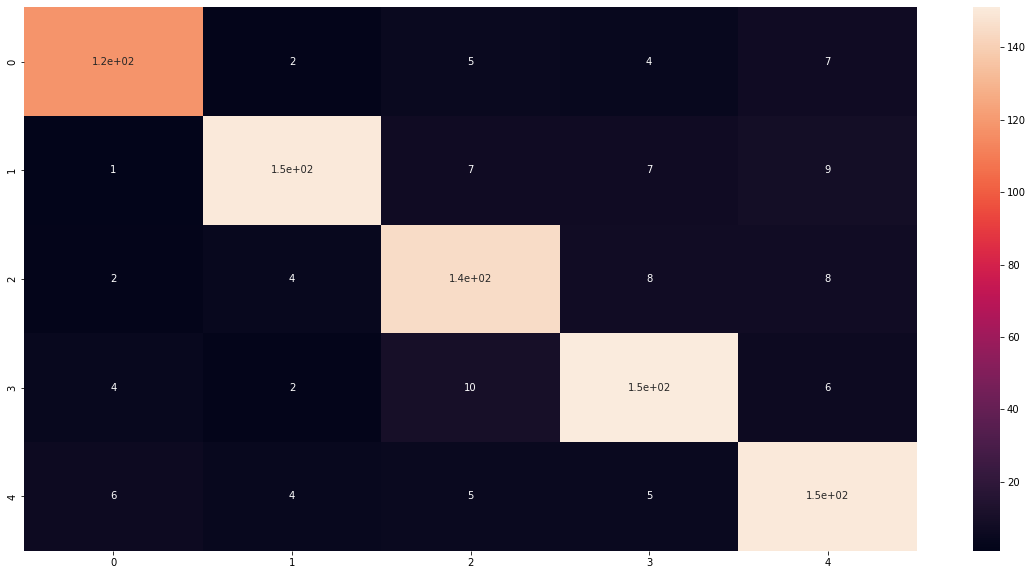

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(testing_labels, predicted_labels)
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot = True)